In [1]:
## Data access
import xarray as xr
import numpy as np
import pandas as pd
from erddapy import ERDDAP
import warnings
warnings.filterwarnings('ignore')

In [2]:
from utils import *

In [3]:
# Set up the erddap server
erd = ERDDAP(
    server="https://erddap.dataexplorer.oceanobservatories.org/erddap",
    protocol="tabledap"
)

In [4]:
# Search for the example dataset
search_url = erd.get_search_url(
    search_for = "Papa oxygen",
    response = "csv"
)

# List the datasets
pd.read_csv(search_url)["Dataset ID"]

0    ooi-gp03flma-ris01-03-dostad000
1    ooi-gp03flmb-ris01-03-dostad000
Name: Dataset ID, dtype: object

In [5]:
# Select a dataset
dataset_id = "ooi-gp03flma-ris01-03-dostad000"
erd.dataset_id = dataset_id
erd.constraints = {}

In [6]:
# Get the data
data = erd.to_xarray()
data = data.swap_dims({"obs":"time"})
data

<xarray.Dataset>
Dimensions:                                                        (
                                                                    timeseries: 1,
                                                                    time: 134621)
Coordinates:
    latitude                                                       (timeseries) float64 ...
    longitude                                                      (timeseries) float64 ...
  * time                                                           (time) datetime64[ns] ...
Dimensions without coordinates: timeseries
Data variables:
    station                                                        (timeseries) object ...
    rowSize                                                        (timeseries) int32 ...
    z                                                              (time) float64 ...
    mole_concentration_of_dissolved_molecular_oxygen_in_sea_water  (time) float64 ...
    moles_of_oxygen_per_unit_mass_in_sea_water                     (time) float64 ...
    sea_water_practical_salinity                                   (time) float64 ...
    sea_water_pressure                                             (time) float64 ...
    sea_water_temperature                                          (time) float64 ...
Attributes: (12/50)
    cdm_data_type:                 TimeSeries
    cdm_timeseries_variables:      station,longitude,latitude
    contributor_email:             feedback@axiomdatascience.com
    contributor_name:              Axiom Data Science
    contributor_role:              processor
    contributor_role_vocabulary:   NERC
    ...                            ...
    station_id:                    104172.0
    summary:                       Timeseries data from 'Global Station Papa:...
    time_coverage_end:             2022-05-19T17:00:00Z
    time_coverage_start:           2013-07-21T22:45:00Z
    title:                         Global Station Papa: Flanking Subsurface M...
    Westernmost_Easting:           -144.360783

In [7]:
# Get the deployment information -> need to download from DAta Explorer as a csv
annotations = pd.read_csv("data/annotations.csv")

In [8]:
# Add the deployments
data = add_deployments(data, annotations)
data

<xarray.Dataset>
Dimensions:                                                        (
                                                                    timeseries: 1,
                                                                    time: 134621)
Coordinates:
    latitude                                                       (timeseries) float64 ...
    longitude                                                      (timeseries) float64 ...
  * time                                                           (time) datetime64[ns] ...
Dimensions without coordinates: timeseries
Data variables:
    station                                                        (timeseries) object ...
    rowSize                                                        (timeseries) int32 ...
    z                                                              (time) float64 ...
    mole_concentration_of_dissolved_molecular_oxygen_in_sea_water  (time) float64 ...
    moles_of_oxygen_per_unit_mass_in_sea_water                     (time) float64 ...
    sea_water_practical_salinity                                   (time) float64 ...
    sea_water_pressure                                             (time) float64 ...
    sea_water_temperature                                          (time) float64 ...
    deployment                                                     (time) int64 ...
Attributes: (12/50)
    cdm_data_type:                 TimeSeries
    cdm_timeseries_variables:      station,longitude,latitude
    contributor_email:             feedback@axiomdatascience.com
    contributor_name:              Axiom Data Science
    contributor_role:              processor
    contributor_role_vocabulary:   NERC
    ...                            ...
    station_id:                    104172.0
    summary:                       Timeseries data from 'Global Station Papa:...
    time_coverage_end:             2022-05-19T17:00:00Z
    time_coverage_start:           2013-07-21T22:45:00Z
    title:                         Global Station Papa: Flanking Subsurface M...
    Westernmost_Easting:           -144.360783

In [9]:
# Parse the annotation qc flags
data = add_qc_flag(data, annotations)
data

<xarray.Dataset>
Dimensions:                                                        (
                                                                    timeseries: 1,
                                                                    time: 134621)
Coordinates:
    latitude                                                       (timeseries) float64 ...
    longitude                                                      (timeseries) float64 ...
  * time                                                           (time) datetime64[ns] ...
Dimensions without coordinates: timeseries
Data variables:
    station                                                        (timeseries) object ...
    rowSize                                                        (timeseries) int32 ...
    z                                                              (time) float64 ...
    mole_concentration_of_dissolved_molecular_oxygen_in_sea_water  (time) float64 ...
    moles_of_oxygen_per_unit_mass_in_sea_water                     (time) float64 ...
    sea_water_practical_salinity                                   (time) float64 ...
    sea_water_pressure                                             (time) float64 ...
    sea_water_temperature                                          (time) float64 ...
    deployment                                                     (time) int64 ...
    annotation_qc_flag                                             (time) int64 ...
Attributes: (12/50)
    cdm_data_type:                 TimeSeries
    cdm_timeseries_variables:      station,longitude,latitude
    contributor_email:             feedback@axiomdatascience.com
    contributor_name:              Axiom Data Science
    contributor_role:              processor
    contributor_role_vocabulary:   NERC
    ...                            ...
    station_id:                    104172.0
    summary:                       Timeseries data from 'Global Station Papa:...
    time_coverage_end:             2022-05-19T17:00:00Z
    time_coverage_start:           2013-07-21T22:45:00Z
    title:                         Global Station Papa: Flanking Subsurface M...
    Westernmost_Easting:           -144.360783

In [11]:
import matplotlib.pyplot as plt

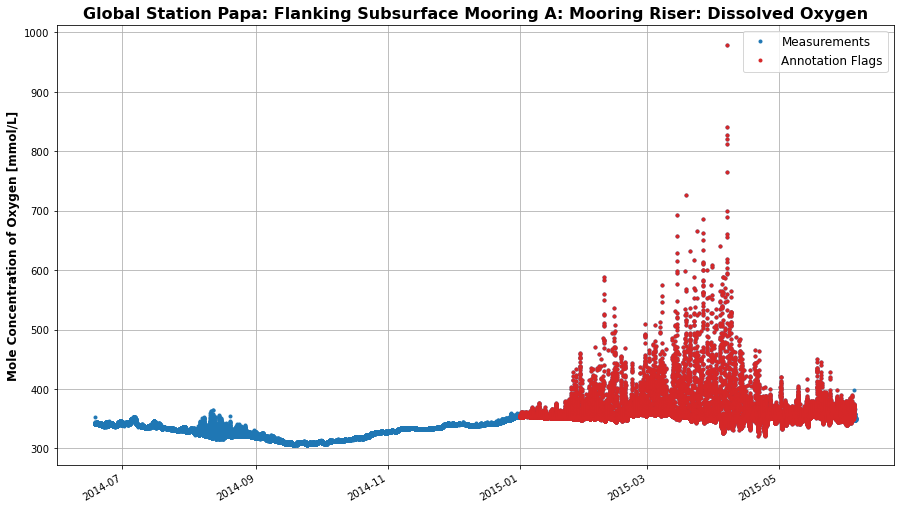

In [17]:
# Plot Deployment 2 with the QC Flags
fig, ax = plt.subplots(figsize=(15, 9))

# Select the deployment 2 data
dep2_data = data.where(data.deployment == 2, drop=True)

# Observations
ax.plot(dep2_data["time"], dep2_data["mole_concentration_of_dissolved_molecular_oxygen_in_sea_water"], marker=".", linestyle="", color="tab:blue", label="Measurements")

# Plot the annotation flag data
mask = (dep2_data["annotation_qc_flag"] == 3)
ax.plot(dep2_data["time"][mask], dep2_data["mole_concentration_of_dissolved_molecular_oxygen_in_sea_water"][mask], marker=".", linestyle="", color="tab:red", label="Annotation Flags")

# Figure params
ax.grid()
ax.set_ylabel("Mole Concentration of Oxygen [mmol/L]", fontsize=12, weight="bold")
ax.legend(fontsize=12)
ax.set_title(dep2_data.attrs["platform_name"], fontsize=16, weight="bold")

fig.autofmt_xdate()

---
## Determine if Biofouled
Next, want to develop a piece of code to parse the annotation to see if it specifically mentions being biofouled, and then to add that to the dataset as a specific variable and flag

In [ ]:
def add_biofouled(ds, annotations):
    